In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import ptitprince as pt
import matplotlib.collections as clt


## SOURCE CONTROLLED ACCURACY AND REACTION TIMES FOR INFERENCE

In [2]:
cp_cma = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/EmoInf_consolidation/CMA_data/summarized_pt/master_results.csv')

In [3]:
list(cp_cma.columns)

['Participant',
 'AB1allCorr',
 'AB1neuCorr',
 'AB1fearCorr',
 'AB1allAcc',
 'AB1neuAcc',
 'AB1fearAcc',
 'AB1allRT',
 'AB1neuRT',
 'AB1fearRT',
 'AB2allCorr',
 'AB2neuCorr',
 'AB2fearCorr',
 'AB2allAcc',
 'AB2neuAcc',
 'AB2fearAcc',
 'AB2allRT',
 'AB2neuRT',
 'AB2fearRT',
 'AB3allCorr',
 'AB3neuCorr',
 'AB3fearCorr',
 'AB3allAcc',
 'AB3neuAcc',
 'AB3fearAcc',
 'AB3allRT',
 'AB3neuRT',
 'AB3fearRT',
 'BCXYallCorr',
 'BCallCorr',
 'BCneuCorr',
 'BCfearCorr',
 'XYallCorr',
 'XYneuCorr',
 'XYfearCorr',
 'BCallAcc',
 'BCneuAcc',
 'BCfearAcc',
 'BCTot',
 'BCneuTot',
 'BCfearTot',
 'XYallAcc',
 'XYneuAcc',
 'XYfearAcc',
 'XYTot',
 'XYneuTot',
 'XYfearTot',
 'BCXYallRT',
 'BCneuRT',
 'BCfearRT',
 'XYneuRT',
 'XYfearRT',
 'ACallCorr',
 'ACneuCorr',
 'ACfearCorr',
 'ACallAcc',
 'ACneuAcc',
 'ACfearAcc',
 'adjACallAcc',
 'adjACneuAcc',
 'adjACfearAcc',
 'adjACLen',
 'ACallRT',
 'ACneuRT',
 'ACfearRT',
 'adjACallRT',
 'adjACneuRT',
 'adjACfearRT',
 'ACxallCorr',
 'ACxneuCorr',
 'ACxfearCorr',
 'A

In [4]:
stacked_exp5 = pd.melt(cp_cma, id_vars=['Participant'], value_vars=['dABneuAcc', 'dABfearAcc','dBCneuAcc', 'dBCfearAcc', 'dXYneuAcc', 'dXYfearAcc', 'adjACxneuAcc', 'adjACxfearAcc'], var_name='condition', value_name='Total_acc')

stacked_exp5 ['ExpNum'] = '5'

mrg_experiments= [stacked_exp5]
experiments = pd.concat(mrg_experiments)
experiments

,Participant,condition,Total_acc,ExpNum
0,2,dABneuAcc,0.666667,5
1,3,dABneuAcc,0.708333,5
2,4,dABneuAcc,1.000000,5
3,5,dABneuAcc,1.000000,5
4,6,dABneuAcc,1.000000,5
...,...,...,...,...
299,35,adjACxfearAcc,0.333333,5
300,36,adjACxfearAcc,0.869565,5
301,37,adjACxfearAcc,0.400000,5
302,39,adjACxfearAcc,0.952381,5


In [5]:
experiments

,Participant,condition,Total_acc,ExpNum
0,2,dABneuAcc,0.666667,5
1,3,dABneuAcc,0.708333,5
2,4,dABneuAcc,1.000000,5
3,5,dABneuAcc,1.000000,5
4,6,dABneuAcc,1.000000,5
...,...,...,...,...
299,35,adjACxfearAcc,0.333333,5
300,36,adjACxfearAcc,0.869565,5
301,37,adjACxfearAcc,0.400000,5
302,39,adjACxfearAcc,0.952381,5


## MAIN Data figure: BCXY and AC

In [6]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

#fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

experiments.loc[experiments['condition'] == 'dABneuAcc', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'dBCneuAcc', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'dXYneuAcc', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'adjACxneuAcc', 'valence'] = 'c-neutral'


experiments.loc[experiments['condition'] == 'dABfearAcc', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'dBCfearAcc', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'dXYfearAcc', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'adjACxfearAcc', 'valence'] = 'fearful'


experiments.loc[experiments['condition'] == 'dABneuAcc', 'Test'] = '1-Initial learning day 2(AB)'
experiments.loc[experiments['condition'] == 'dBCneuAcc', 'Test'] = '2-Overlapping pairs day 2(BC)'
experiments.loc[experiments['condition'] == 'dXYneuAcc', 'Test'] = '3-Non-overlapping pairs day 2(XY)'
experiments.loc[experiments['condition'] == 'adjACxneuAcc', 'Test'] = '5-Inference day 2(AC2)'


experiments.loc[experiments['condition'] == 'dABfearAcc', 'Test'] = '1-Initial learning day 2(AB)'
experiments.loc[experiments['condition'] == 'dBCfearAcc', 'Test'] = '2-Overlapping pairs day 2(BC)'
experiments.loc[experiments['condition'] == 'dXYfearAcc', 'Test'] = '3-Non-overlapping pairs day 2(XY)'
experiments.loc[experiments['condition'] == 'adjACxfearAcc', 'Test'] = '5-Inference day 2(AC2)'


exp5 = experiments.loc[experiments['ExpNum'] == '5']

AB3 = experiments.loc[experiments['Test'] == '1-Initial learning day 2(AB)']
BC = experiments.loc[experiments['Test'] == '2-Overlapping pairs day 2(BC)']
XY = experiments.loc[experiments['Test'] == '3-Non-overlapping pairs day 2(XY)']
AC2 = experiments.loc[experiments['Test'] == '5-Inference day 2(AC2)']

In [7]:

### BC
BCexp5_neu = exp5.loc[exp5['condition'] == 'dBCneuAcc']
BCexp5_emo = exp5.loc[exp5['condition'] == 'dBCfearAcc']


## XY
XYexp5_neu = exp5.loc[exp5['condition'] == 'dXYneuAcc']
XYexp5_emo = exp5.loc[exp5['condition'] == 'dXYfearAcc']

## AC
AC2exp5_neu = exp5.loc[exp5['condition'] == 'adjACxneuAcc']
AC2exp5_emo = exp5.loc[exp5['condition'] == 'adjACxfearAcc']

exp5BC = exp5.loc[exp5['Test'] == '2-Overlapping pairs day 2(BC)']
exp5XY = exp5.loc[exp5['Test'] == '3-Non-overlapping pairs day 2(XY)']
exp5AC2 = exp5.loc[exp5['Test'] == '5-Inference day 2(AC2)']
mainexp5 = [exp5BC, exp5XY, exp5AC2]
mainexp5 = pd.concat(mainexp5)

neuBC_mean5 = np.mean(BCexp5_neu['Total_acc'])
emoBC_mean5 = np.mean(BCexp5_emo['Total_acc'])


neuBC_std5 = stats.sem(BCexp5_neu['Total_acc'])
emoBC_std5 = stats.sem(BCexp5_emo['Total_acc'])


neuXY_mean5 = np.mean(XYexp5_neu['Total_acc'])
emoXY_mean5 = np.mean(XYexp5_emo['Total_acc'])


neuXY_std5 = stats.sem(XYexp5_neu['Total_acc'])
emoXY_std5 = stats.sem(XYexp5_emo['Total_acc'])


neuAC_mean5 = np.mean(AC2exp5_neu['Total_acc'])
emoAC_mean5 = np.mean(AC2exp5_emo['Total_acc'])


neuAC_std5 = stats.sem(AC2exp5_neu['Total_acc'])
emoAC_std5 = stats.sem(AC2exp5_emo['Total_acc'])


neutral_means5 = [neuBC_mean5, neuXY_mean5, neuAC_mean5]
neutral_sems5= [neuBC_std5, neuXY_std5, neuAC_std5]
emotional_means5 = [emoBC_mean5, emoXY_mean5, emoAC_mean5]
emotional_sems5 = [emoBC_std5, emoXY_std5, emoAC_std5]


In [8]:
neutral_means5

[0.6928556647368422, 0.6800077409736841, 0.703006066131579]

### Line/ Bar Graphs

In [9]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
#plt.rc('font', serif='Helvetica Neue') 
plt.rc('font', serif='Helvetica Neue')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype']= 'none'
plt.rcParams.update({'font.size': 28})
plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=20)

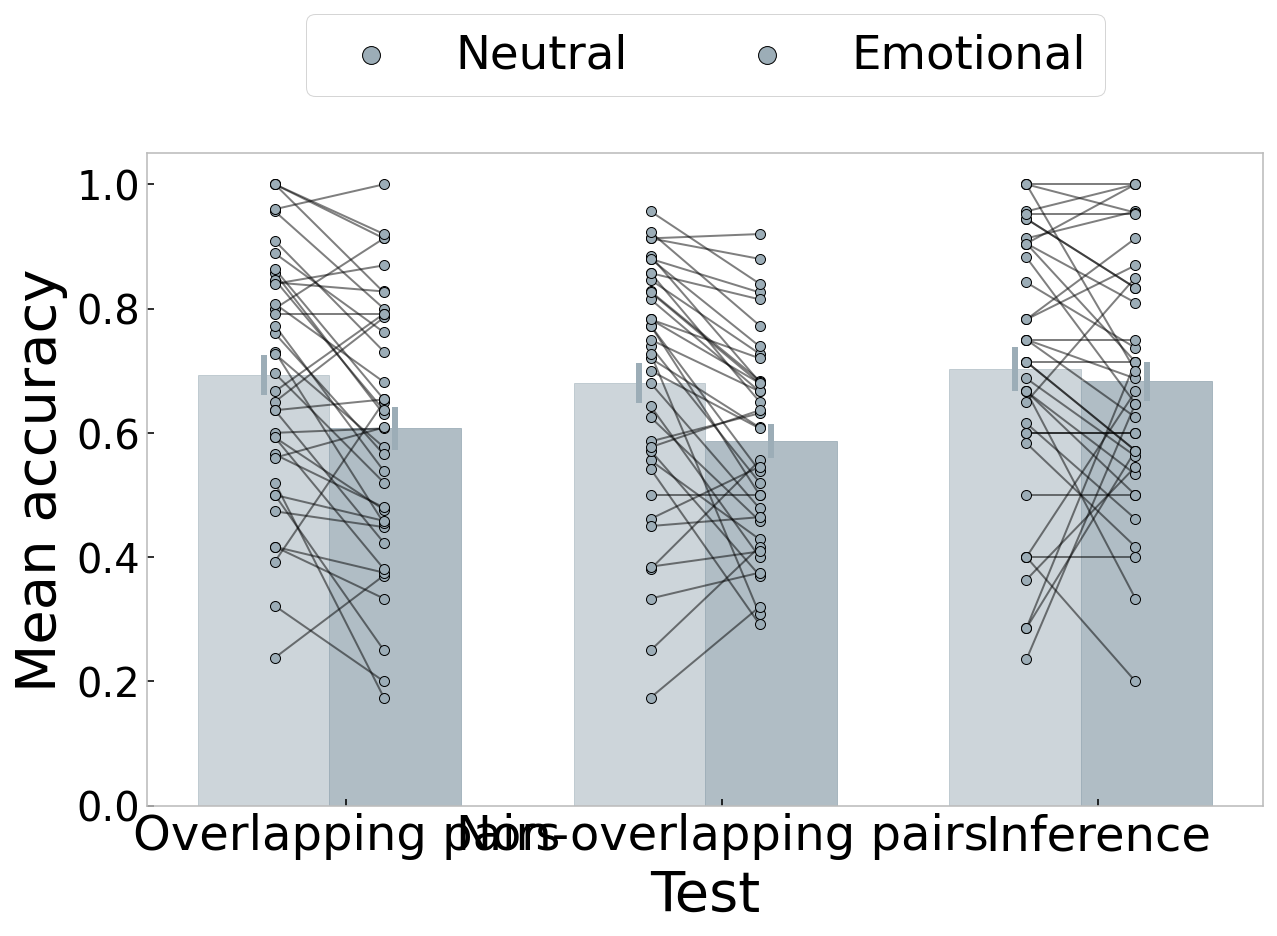

In [10]:
#UT branded colors 
#red = '#c51b8a' #yellow 
#blue = '#fa9fb5' #neutral
white = '#ffffff'
black = '#333f48'
ut_yellow = '#ffd600' #neutral
ut_orange = '#f8971f' #emotional
ut_blue= '#00a9b7' #neutral
ut_dblue= '#005f86' #emotional
ut_grey = '#9cadb7'

fig, ax = plt.subplots(figsize=(10, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(3) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means5, width,
    color= ut_grey,
    #hatch = '.',
    edgecolor= ut_grey,
    alpha = 0.5,
    yerr=neutral_sems5,
    error_kw=dict(elinewidth=3,ecolor= ut_grey))
ax.bar(ind+width, emotional_means5, width,
    color= ut_grey,
    #hatch = '.',
    edgecolor= ut_grey,
    alpha = 0.8,
    yerr=emotional_sems5,
    error_kw=dict(elinewidth=3,ecolor= ut_grey))

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

for one_exp, subdf in mainexp5.groupby('Test'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "c-neutral"')['Total_acc'].values
    d = subdf.query('valence == "fearful"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(d))
    alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1+0.03], h, c=ut_grey, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2-0.08], d, c=ut_grey, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs', 'Non-overlapping pairs', 'Inference']
ax.set_xticks([0.22, 1.22, 2.22])
_ = ax.set_xticklabels(lbls, fontsize='24')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='small',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 28)
ax.set_ylabel('Mean accuracy', fontsize =28)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

plt.savefig('exp5b_day2_XY.pdf')

In [11]:
one_exp

'5-Inference day 2(AC2)'

## AB3 Learning curve

In [12]:
ABstacked_exp5 = pd.melt(cp_cma, id_vars=['Participant'], value_vars=['dABneuAcc', 'dABfearAcc'], var_name='condition', value_name='Total_acc')
ABstacked_exp5.loc[ABstacked_exp5['condition'] == 'dABneuAcc', 'Test'] = 'AB'
ABstacked_exp5.loc[ABstacked_exp5['condition'] == 'dABfearAcc', 'Test'] = 'AB'

ABstacked_exp5.loc[ABstacked_exp5['condition'] == 'dABneuAcc', 'valence'] = 'c-neutral'
ABstacked_exp5.loc[ABstacked_exp5['condition'] == 'dABfearAcc', 'valence'] = 'fearful'

AB = ABstacked_exp5.loc[ABstacked_exp5['Test'] == 'AB']

neuAB = AB.loc[AB['valence'] == 'c-neutral']
emoAB = AB.loc[AB['valence'] == 'fearful']

neuAB_mean = np.mean(neuAB['Total_acc'])
neuAB_std = stats.sem(neuAB['Total_acc'])
emoAB_mean = np.mean(emoAB['Total_acc'])
emoAB_std = stats.sem(emoAB['Total_acc'])

neutralAB_means = [neuAB_mean]
neutralAB_sems = [neuAB_std]
emotionalAB_means = [emoAB_mean]
emotionalAB_sems = [emoAB_std]


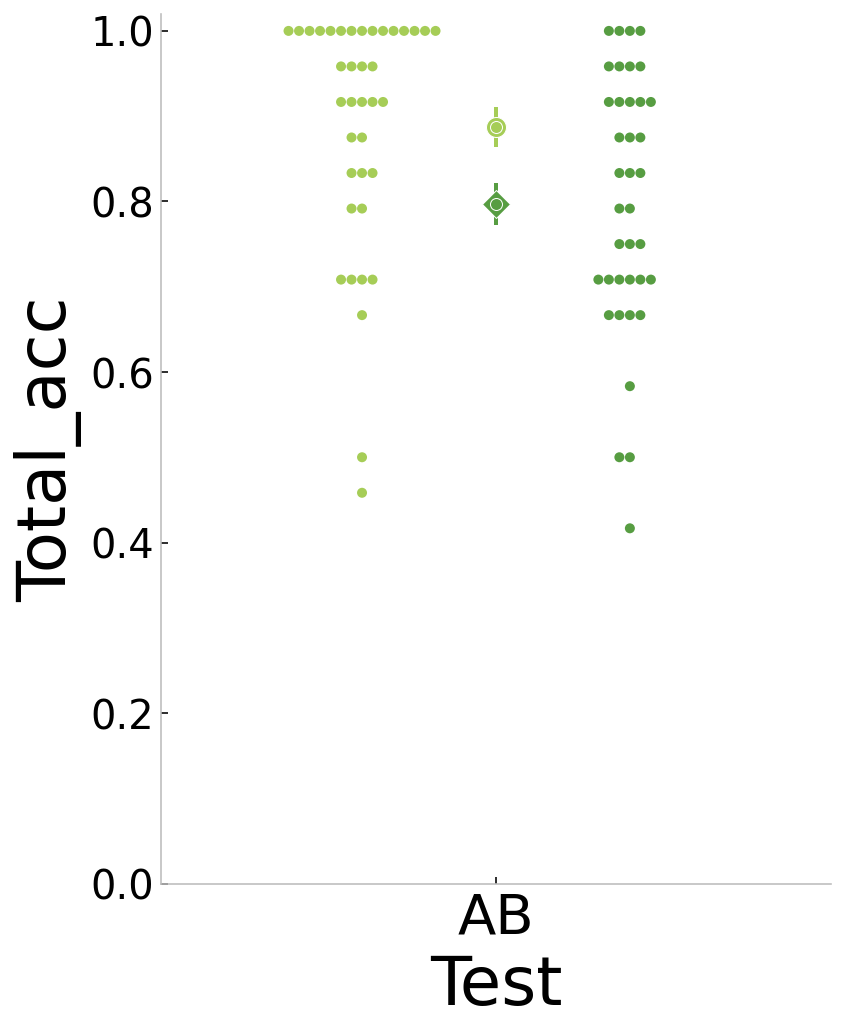

In [13]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral

lightg= '#a6cd57'#'#a1d99b'
darkg= '#579d42'#'#31a354'

colors = [lightg, darkg]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 8))

g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp5, palette = customPalette, dodge=True)
#plot.get_legend().set_visible(False)
g.legend_.remove()
sns.despine()
ABstacked_exp5.describe()
utneu = '#f8971f'
utemo = '#bf5700'
Tests = ['Initial learning test day 2']
ABmeans_df = pd.DataFrame({
    'Tests': Tests, 
    'Neutral Means': neutralAB_means,
    'Emotional Means': emotionalAB_means})
plt.plot('Tests', 'Neutral Means', data=ABmeans_df, linestyle='-', linewidth = 2,  marker='o', markersize = 10, color = lightg)
plt.errorbar(Tests, neutralAB_means, yerr=neutralAB_sems, fmt="o", color = lightg)
plt.plot('Tests', 'Emotional Means', data=ABmeans_df, linestyle='-', linewidth = 2, marker='D', markersize = 10, color = darkg)
plt.errorbar(Tests, emotionalAB_means, yerr=emotionalAB_sems, fmt="o", color = darkg)
plt.ylim (0,1.02)
#plt.ylabel('Mean Accuracy', fontsize=28)
plt.savefig('exp5_AB.svg')
plt.show()

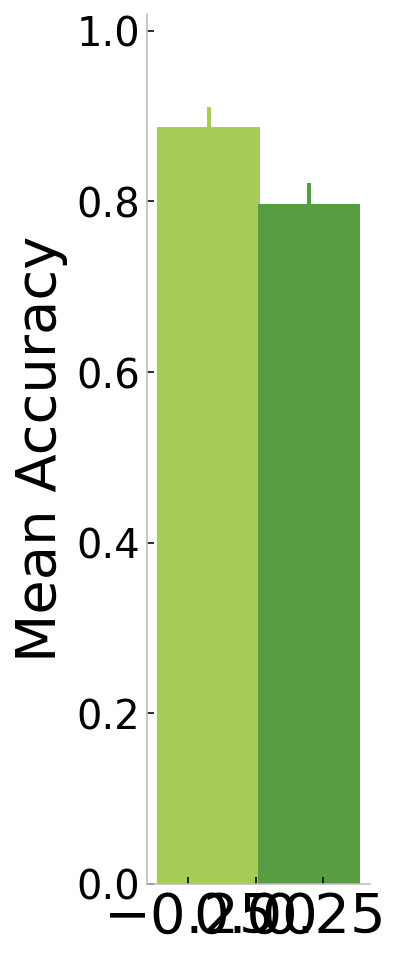

In [15]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral

lightg= '#a6cd57'#'#a1d99b'
darkg= '#579d42'#'#31a354'

colors = [lightg, darkg]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(2, 8))
#g = sns.scatterplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp1, palette = customPalette, s = 45, edgecolor = 'black')
#plot.get_legend().set_visible(False)
#g.legend_.remove()
sns.despine()
ABstacked_exp5.describe()
utneu = '#f8971f'
utemo = '#bf5700'
Tests = ['Initial learning test day 2']
ABmeans_df = pd.DataFrame({
    'Tests': Tests, 
    'Neutral Means': neutralAB_means,
    'Emotional Means': emotionalAB_means})
#fig, ax = plt.subplots(figsize=(10, 6))
##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
#wid= 0.35/2 # the width of the bars
plt.bar(ind-0.175, 'Neutral Means', data=ABmeans_df, color = lightg, width = 0.38, yerr = neutralAB_sems, ecolor = lightg, error_kw=dict(lw= 2))
plt.bar(ind + 0.197, 'Emotional Means', data=ABmeans_df, color = darkg, width = 0.38, yerr = emotionalAB_sems, ecolor = darkg, error_kw = dict(lw = 2))
plt.ylim (0,1.02)
plt.ylabel('Mean Accuracy', fontsize=28)
#plt.savefig('exp3_AB.svg')
plt.savefig('exp5_day2_barAB.pdf')
plt.show()